## Level 3: Dynamic Trajectory Manoeuvring 

In this dynamic challenge, participants are tasked with equipping **RoboRig** with the ability to navigate a circular path smoothly and jerk-free using dynamic control. Building upon the foundation laid in previous levels, participants must tackle the added complexity of dynamic motion control, ensuring RoboRig's trajectory remains seamless and precise.

As in previous levels, participants must define a circular trajectory for RoboRig to follow. The circular path should be clearly indicated, facilitating easy visualization of both the desired trajectory and RoboRig's movement. Unlike static kinematic control, dynamic control involves accounting for factors such as inertia, acceleration, and external forces.

Participants must implement algorithms to adjust RoboRig's motion dynamically, ensuring smooth and jerk-free movement along the circular path. Clear visualization of both the desired trajectory and the trajectory followed by RoboRig is crucial for accurate evaluation.

The simulation window should distinctly display the circular path and RoboRig's movement, enabling easy assessment of whether the end effector reaches the intended trajectory.

**Submit the .csv file along with code and simulation results**, which may contain three columns: (time, X-coordinate, Y-coordinate).

**Trajectory**: Circle [ \(x=\sin(2t)\), \(y=\cos(2t)\), total time = 4 sec]

### Judging Criteria:
- **Accuracy of dynamic trajectory following**: 15 points
- **Code**: 10 points
- **Smoothness of movement**: 5 points


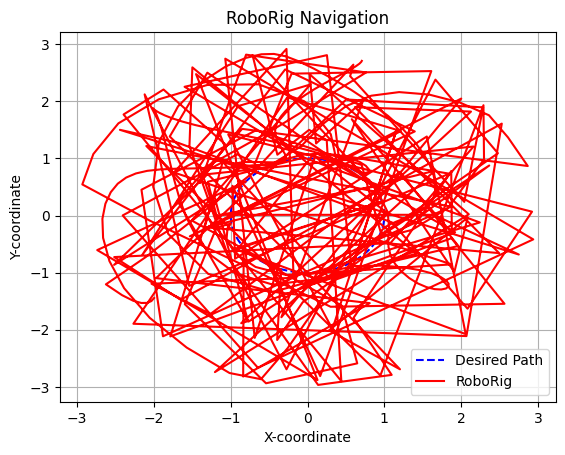

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L1 = 1
L2 = 2
m1 = 1
m2 = 2
total_time = 4
dt = 0.01  # Time step

# Time array
t = np.arange(0, total_time, dt)

# Circular path
x_desired = np.sin((np.pi / 2)*t)
y_desired = np.cos((np.pi / 2)*t)

# Control algorithm (PD controller)
Kp = 100
Kd = 20

# Initial conditions
theta1 = np.pi / 4  # initial angle for joint 1
theta2 = np.pi / 4  # initial angle for joint 2
omega1 = 0  # initial angular velocity for joint 1
omega2 = 0  # initial angular velocity for joint 2

# Arrays to store data
x_robot = np.zeros_like(t)
y_robot = np.zeros_like(t)

# Simulation
for i in range(len(t)):
    # Desired end effector position from circular path
    x_d = x_desired[i]
    y_d = y_desired[i]

    # Forward kinematics to calculate end effector position
    x_e = L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2)
    y_e = L1 * np.sin(theta1) + L2 * np.sin(theta1 + theta2)

    # Control errors
    error_x = x_d - x_e
    error_y = y_d - y_e

    # Jacobian matrix
    J11 = -L1 * np.sin(theta1) - L2 * np.sin(theta1 + theta2)
    J12 = -L2 * np.sin(theta1 + theta2)
    J21 = L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2)
    J22 = L2 * np.cos(theta1 + theta2)

    # Velocity control input
    v_x = Kp * error_x + Kd * (-omega1 * J12 - omega2 * J22)
    v_y = Kp * error_y + Kd * (-omega1 * J21 - omega2 * J22)

    # Inverse of Jacobian matrix
    det_J = J11 * J22 - J12 * J21
    inv_J11 = J22 / det_J
    inv_J12 = -J12 / det_J
    inv_J21 = -J21 / det_J
    inv_J22 = J11 / det_J

    # Joint velocities
    omega1_dot = inv_J11 * v_x + inv_J12 * v_y
    omega2_dot = inv_J21 * v_x + inv_J22 * v_y

    # Update joint velocities
    omega1 += omega1_dot * dt
    omega2 += omega2_dot * dt

    # Update joint angles
    theta1 += omega1 * dt
    theta2 += omega2 * dt

    # Store end effector position
    x_robot[i] = x_e
    y_robot[i] = y_e

# Visualization
plt.plot(x_desired, y_desired, 'b--', label='Desired Path')
plt.plot(x_robot, y_robot, 'r-', label='RoboRig')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('RoboRig Navigation')
plt.legend()
plt.grid(True)
plt.show()

# Save trajectory data to a .csv file
trajectory_data = np.column_stack((t, x_robot, y_robot))
np.savetxt('RoboRig_trajectory.csv', trajectory_data, delimiter=',', header='Time,X-coordinate,Y-coordinate', comments='')